# Mini-projet: Exemple de système chaotique

### Import des modules

In [1]:
#import des modules
import numpy as np
import matplotlib.pyplot as plt

### Comportement de la suite

On représente le comportement de la suite pour les valeurs  $r=2.5$ et $x_0=0.1$

In [2]:
# Initialisation des variables
r   = 2.5
x_0 = 0.1

In [3]:
# Intervalle d'années
start  = 0
fin    = 20
years  = np.arange(start,fin+1,1)
timelength = len(years)

(Text(0.5, 0, 'Temps (années)'), Text(0, 0.5, '$x_i = n_i / n_{\\max}$'))

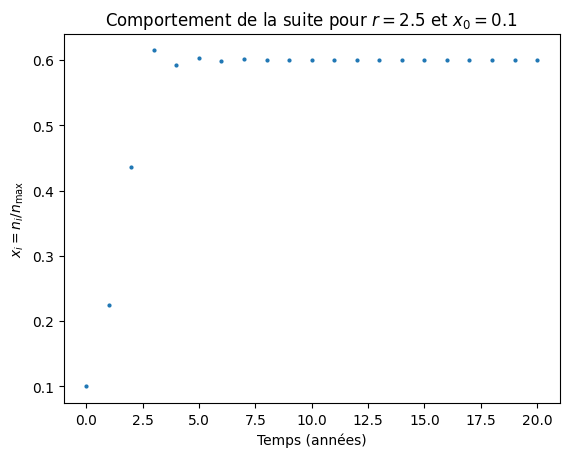

In [4]:
# On cree un tableau auquel attacher les valeurs de x_n
x_n    = np.ones(timelength)* x_0

for year in range(1,timelength):
    x_n[year]=r*x_n[year-1]*(1-x_n[year-1])

plt.scatter(years,x_n,s=4)
plt.title("Comportement de la suite pour $r=2.5$ et $x_0=0.1$")
plt.xlabel("Temps (années)"), plt.ylabel("$x_i = n_i / n_{\max}$")

On remarque bien q'à partir de plusieurs années la suite tends vers une valeure définie et donc finie.

On représente le comportement de la suite pour plusieurs valeurs de $r$ et $x_0=0.1$

In [5]:
# On définit plusieurs valeurs de r
r = [2.7, 3, 4]

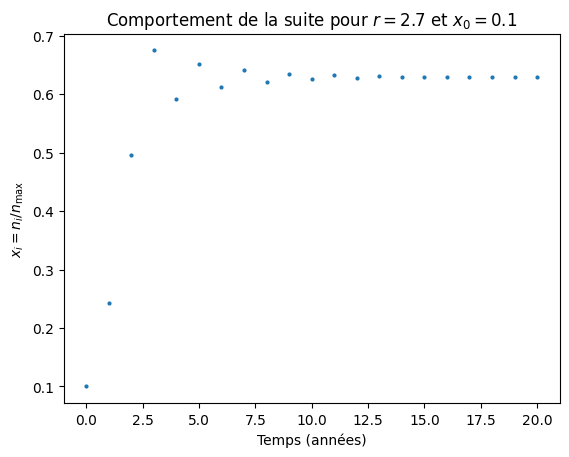

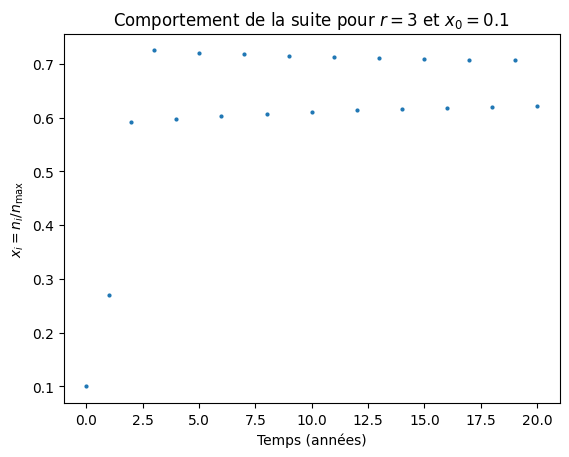

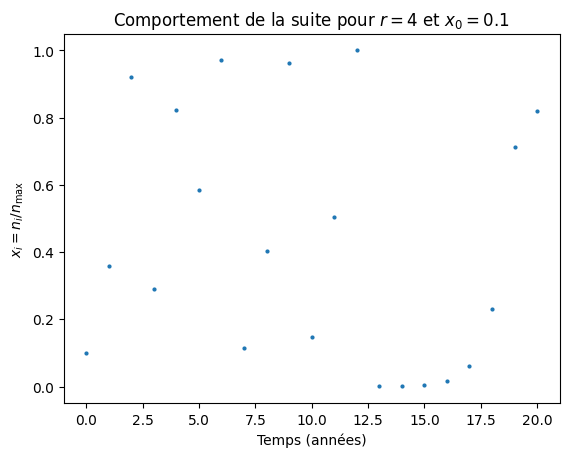

In [6]:
x_n = np.ones((3,timelength))*x_0

for i,l in enumerate(r):
    for year in range(1,timelength):
        x_n[i,year]=(l*(1-x_n[i,year-1])*x_n[i,year-1])
    
    title="Comportement de la suite pour $r="+str(l)+"$ et $x_0=0.1$"
    plt.scatter(years,x_n[i],s=4)
    plt.title(title)
    plt.xlabel("Temps (années)"), plt.ylabel("$x_i = n_i / n_{\max}$")
    plt.show()

On constate une plus grande oscillation des valeurs de la suite lorsque r augmente notamment pour les premiers années, mais une stabilisation de la tendance de la suite à un moment donnée après suffisament d'années.

### Diagramme de bifurcation

In [7]:
r   = np.linspace(2.5,4,200)
x_0 = 0.00001

In [8]:
# on cree une liste avec la plage années dans lesquelles con va étudier notre sysème
start      = 0
end        = 1000
years      = np.arange(start,end+1,1)
timelength = len(years)

In [9]:
# Création du tableau pour les valeurs de x
x_n = np.ones((len(r),timelength))*x_0

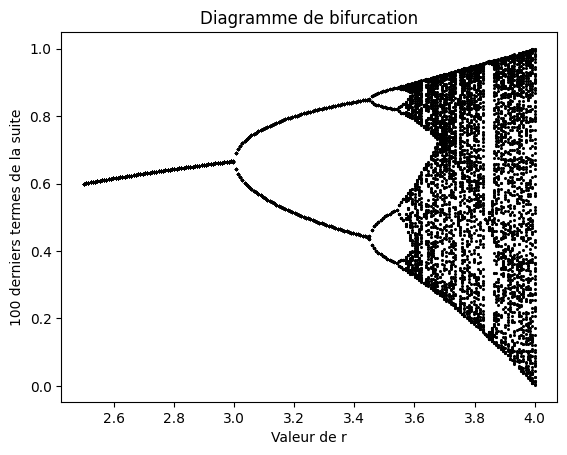

In [10]:
# Calcul de la progression de x le long des annees  pour chaque valeur de r
for i,l in enumerate(r):
    for year in range(1,timelength):# on calcule à partir de l'annee 1
        x_n[i,year]=(l*(1-x_n[i,year-1])*x_n[i,year-1])  

# On prend les 100 derniers valeurs de x pour chaque valeur de r
x_100 = x_n[:,-100:]

# Mise en forme pour le plot
x_100  = x_100.flatten()
r_plot = np.repeat(r,100)

# Repésentation de données
plt.scatter(r_plot,x_100,s=1.5,color='k') 
plt.title("Diagramme de bifurcation")
plt.xlabel("Valeur de r"), plt.ylabel("100 derniers termes de la suite")
plt.show()

On constate que lorsque r prend des valeurs plus élévés les derniers termes de la suite commencent à bifurquer les uns des autres, divergeant de la limite définie qu'on observe au debut où les valeurs aquièrent une même valeur.  
On remarque en plus que le diagramme de bifurcation ne dépend pas de la valeur de $x_0$, celle ci étant une valeure initial dont la suite est de moins en moins dépendante lorsque celle ci évolue.

## Exposant de Lyapunov

Notre objectif est, pour chaque valeur de r, calculer l'exposant de Lyapunov $\lambda$ et tracer le couple de points (r,$\lambda$). Voici la formule de l'exposant de Lyapunov $\lambda(r)$: 

$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$

On rappele la formule de $f(x_i)$: $$f(x) = r (1-x) x $$ 
En calculant sa dérivée on obtient: $$f^{\prime} (x_i)=r (1-2x_{i})$$

In [16]:
r   = np.linspace(2.5,4,500)
x_0 = 0.00001
x_n = np.ones((len(r),timelength))*x_0

In [17]:
lyapunov_matrix = np.ones((len(r),timelength-1))
lyapunov= np.ones(len(r))

for i,l in enumerate(r):
    for year in range(1,timelength):
        x_n[i,year]=(l*(1-x_n[i,year-1])*x_n[i,year-1])
        
        lyapunov_matrix[i,year-1]=np.log(abs(l*(1-2*x_n[i,year-1])))
        lyapunov[i]=np.sum(lyapunov_matrix[i])/timelength

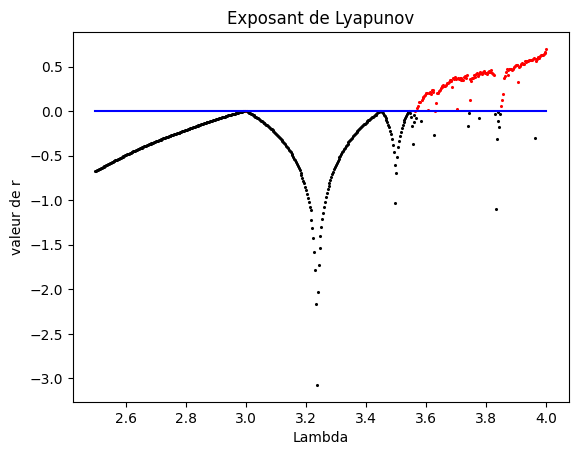

In [19]:
under_mask = lyapunov<0
above_mask = lyapunov>0


# Tracé du graphe
plt.scatter(r[above_mask],lyapunov[above_mask],s=1.5, color='r') # Points rouges pour les lambda > 0
plt.scatter(r[under_mask],lyapunov[under_mask],s=1.5, color='k') # Points black pour les lambda < 0
plt.plot(r,np.zeros(len(r)),'b')
plt.title("Exposant de Lyapunov")
plt.xlabel("Lambda"), plt.ylabel("valeur de r")
plt.show()

On peut, en comparant avec le diagramme de bifurcation, remarquer plusieures relations entre le coefficient $\lambda$ et les bifurcations du diagramme. On voit ainsi qu'à la valeur de $r$ de la première et deuxième bifurcations la valeur de $\lambda$ atteigne juste la frontière de la stabilité sans la franchir, ce qui explique l'absence de plusieures bifurcations succesives. Néanmoins, lorsque la valeure de $r$ surpasse $3.5$ on observe que la valeur de $\lambda$ devient instable et le début des bifurcations succesives dans le diagramme de bifurcation.